In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 96% 209M/218M [00:02<00:00, 116MB/s]
100% 218M/218M [00:02<00:00, 88.5MB/s]


In [3]:
import zipfile

In [4]:
data=zipfile.ZipFile('/content/cat-and-dog.zip','r')

In [5]:
data.extractall('/content/data')
data.close()

In [6]:
import tensorflow as tf

In [7]:
from tensorflow import keras

In [8]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization

In [9]:
from keras.models import Sequential

In [10]:
train_data=keras.utils.image_dataset_from_directory(
    directory='/content/data/training_set/training_set',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=True,
    data_format=None,
    verbose=True)

Found 8005 files belonging to 2 classes.


In [11]:
test_data=keras.utils.image_dataset_from_directory(
    directory='/content/data/test_set/test_set',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=True,
    data_format=None,
    verbose=True)

Found 2023 files belonging to 2 classes.


In [12]:
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

In [13]:
train_data=train_data.map(process)
test_data=test_data.map(process)

In [14]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='valid',input_shape=(256,256,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(units=1280,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(units=640,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(units=1,activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1280)                │     147,457,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 640)                 │         819,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             641 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 148,371,905 (565.99 MB)

 Trainable params: 148,371,457 (565.99 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 53s 158ms/step - accuracy: 0.5455 - loss: 6.6027 - val_accuracy: 0.4993 - val_loss: 0.8137
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 58s 105ms/step - accuracy: 0.6566 - loss: 0.6275 - val_accuracy: 0.5947 - val_loss: 0.6861
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.7111 - loss: 0.5693 - val_accuracy: 0.7093 - val_loss: 0.6103
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - accuracy: 0.7503 - loss: 0.5055 - val_accuracy: 0.7286 - val_loss: 0.5649
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.7807 - loss: 0.4732 - val_accuracy: 0.7360 - val_loss: 0.5603
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.8336 - loss: 0.3700 - val_accuracy: 0.7523 - val_loss: 0.6777
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - accuracy: 0.8750 - loss: 0.2829 - val_accuracy: 0.7425 - val_loss: 0.7715
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 103ms/step - accuracy: 0.9024 - loss: 0

In [21]:
import matplotlib.pyplot  as pl

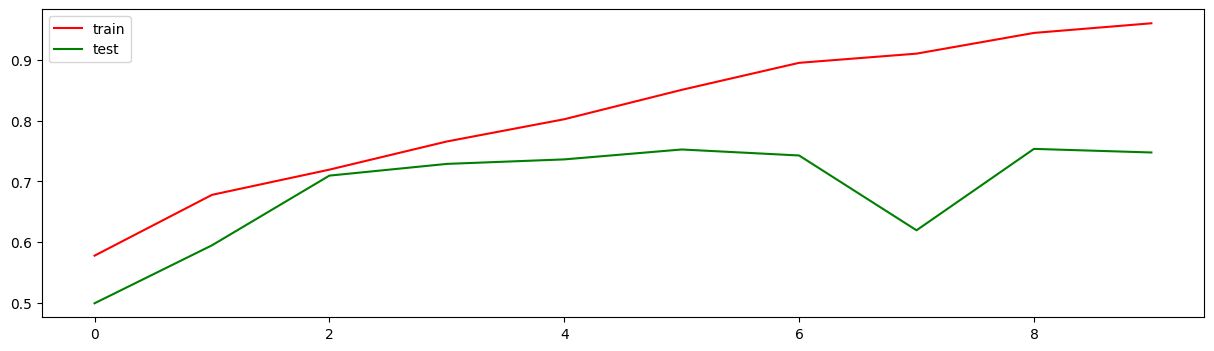

In [22]:
pl.figure(figsize=(15,4))
pl.plot(history.history['accuracy'],color='r',label='train')
pl.plot(history.history['val_accuracy'],color='g',label='test')
pl.legend()
pl.show()

In [23]:
model.evaluate(test_data)

64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7376 - loss: 1.3036


[1.21742582321167, 0.7474048733711243]

In [24]:
import cv2 as cv

In [25]:
dog=cv.imread('/content/download.jpg')

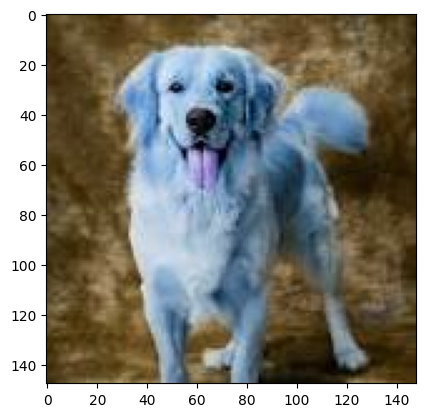

In [26]:
pl.imshow(dog)

In [27]:
dog.shape

(148, 148, 3)

In [33]:
dog_resized= cv.resize(dog, (256, 256))

In [34]:
dog_input=dog_resized.reshape((1,256,256,3))

In [35]:
model.predict(dog_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

In [57]:
cat=cv.imread('/content/istockphoto-1443562748-612x612.jpg')

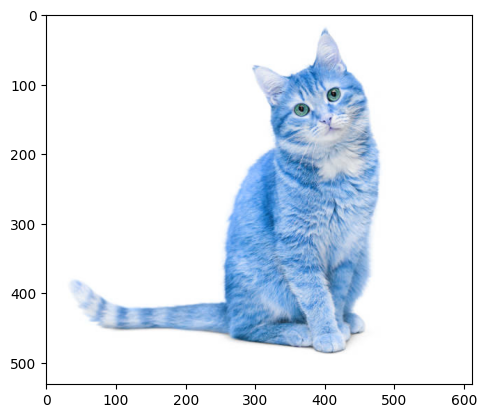

In [58]:
pl.imshow(cat)

In [59]:
cat.shape

(531, 612, 3)

In [60]:
cat=cv.resize(cat,(256,256))

In [61]:
cat.shape

(256, 256, 3)

In [62]:
cat=cat.reshape((1,256,256,3))

In [63]:
model.predict(cat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.]], dtype=float32)